In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmanns-store-sales/sample_submission.csv
/kaggle/input/rossmanns-store-sales/store.csv
/kaggle/input/rossmanns-store-sales/train.csv
/kaggle/input/rossmanns-store-sales/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1.2 Calling Standard Scalar        
from sklearn.preprocessing import StandardScaler
#1.3 Calling Dimentionality reduction Library PCA
from sklearn.decomposition import PCA

#1.4 Splitting Dataset and calling Grid Serarch and Random Search CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#1.5 Calling Pipeline Libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#1.6 Calling XGBoost
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

#1.7 Calling Evalution Matrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.8 Misc
import time
import os
import gc
import random

In [4]:
# import and read train set, test set and store set
rossmann_sales = pd.read_csv("/kaggle/input/rossmanns-store-sales/train.csv")
store = pd.read_csv("/kaggle/input/rossmanns-store-sales/store.csv")
test_set = pd.read_csv("/kaggle/input/rossmanns-store-sales/test.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def info (dataset):
    dataset.info()
    
# to check the info of the dataset

In [6]:
def data(dataset):
    print(dataset.head())
    
# to check the first 5 rows of dataset

In [7]:
data(store)

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [8]:
info(store)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# CLEANING DATA


In [9]:
# clearing null values

def cleaning (dataset):
    dataset['Promo2SinceWeek'] = dataset['Promo2SinceWeek']. fillna(0)
    dataset['Promo2SinceYear'] = dataset['Promo2SinceYear'].fillna(dataset['Promo2SinceYear'].mode().iloc[0])
    dataset['PromoInterval'] = dataset['PromoInterval'].fillna(dataset['PromoInterval'].mode().iloc[0])
    dataset['CompetitionDistance'] = dataset['CompetitionDistance'].fillna(dataset['CompetitionDistance'].max())
    dataset['CompetitionOpenSinceMonth'] = dataset['CompetitionOpenSinceMonth'].fillna(dataset['CompetitionOpenSinceYear'].mode().iloc[0])
    dataset['CompetitionOpenSinceYear'] = dataset['CompetitionOpenSinceYear'].fillna(dataset['CompetitionOpenSinceYear'].mode().iloc[0])
    # can be replaced by mode because very less values are null
    # replaced by max value because more values are non null
    dataset.info()

In [10]:
cleaning(store)

#Dtype = object indicates categorical values in that column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
def find_unique(dataset):
    print(dataset.unique())
    

In [12]:
def describe(dataset):
    print(dataset.describe())

In [13]:
describe(store)

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1115.000000                1115.000000   
mean    558.00000          5594.466368                 644.035874   
std     322.01708          8479.266802                 934.109869   
min       1.00000            20.000000                   1.000000   
25%     279.50000           720.000000                   6.000000   
50%     558.00000          2330.000000                  10.000000   
75%     836.50000          6905.000000                2013.000000   
max    1115.00000         75860.000000                2013.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count               1115.000000  1115.000000      1115.000000      1115.000000  
mean                2010.043946     0.512108        12.083408      2011.391031  
std                    5.500844     0.500078        15.542241         1.257477  
min                 1900.000000     0.000000         0

In [14]:
find_unique(store.Assortment)
find_unique(store.StoreType)
find_unique(store.PromoInterval)
find_unique(rossmann_sales.StateHoliday)

['a' 'c' 'b']
['c' 'a' 'd' 'b']
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
['0' 'a' 'b' 'c' 0]


**Converting all these alphabetic notations (categorical figures) to figures and numbers**

In [15]:
def rem_categorical(dataset):
    dataset['StoreType'] = dataset['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})
    dataset['Assortment'] = dataset['Assortment'].map({'a': 0, 'b': 1, 'c': 2})
    dataset['PromoInterval'] = dataset['PromoInterval'].map({'Jan,Apr,Jul,Oct': 0, 'Feb,May,Aug,Nov': 1, 'Mar,Jun,Sept,Dec': 2})


In [16]:
rem_categorical(store)
data(store)

   Store  StoreType  Assortment  CompetitionDistance  \
0      1          3           0               1270.0   
1      2          1           0                570.0   
2      3          1           0              14130.0   
3      4          3           2                620.0   
4      5          1           0              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0              0.0           2011.0              0  
1             13.0           2010.0              0  
2             14.0           2011.0              0  
3              0.0           2011.0              0  
4

**Convert float to int values**

In [17]:
def float_int(dataset):
    dataset['CompetitionDistance'] = dataset['CompetitionDistance'].astype('int64')
    dataset['CompetitionOpenSinceMonth'] = dataset['CompetitionOpenSinceMonth'].astype('int64')
    dataset['CompetitionOpenSinceYear'] = dataset['CompetitionOpenSinceYear'].astype('int64')
    dataset['Promo2SinceWeek'] = dataset['Promo2SinceWeek'].astype('int64')
    dataset['Promo2SinceYear'] = dataset['Promo2SinceYear'].astype('int64')
    dataset['PromoInterval'] = dataset['PromoInterval'].astype('int64')
    

In [18]:
float_int(store)
info(store)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      1115 non-null   int64
 1   StoreType                  1115 non-null   int64
 2   Assortment                 1115 non-null   int64
 3   CompetitionDistance        1115 non-null   int64
 4   CompetitionOpenSinceMonth  1115 non-null   int64
 5   CompetitionOpenSinceYear   1115 non-null   int64
 6   Promo2                     1115 non-null   int64
 7   Promo2SinceWeek            1115 non-null   int64
 8   Promo2SinceYear            1115 non-null   int64
 9   PromoInterval              1115 non-null   int64
dtypes: int64(10)
memory usage: 87.2 KB


In [19]:
def reduce_size(dataset):
    dataset = dataset.astype('int32')

In [20]:
reduce_size(store)
info(store)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Store                      1115 non-null   int64
 1   StoreType                  1115 non-null   int64
 2   Assortment                 1115 non-null   int64
 3   CompetitionDistance        1115 non-null   int64
 4   CompetitionOpenSinceMonth  1115 non-null   int64
 5   CompetitionOpenSinceYear   1115 non-null   int64
 6   Promo2                     1115 non-null   int64
 7   Promo2SinceWeek            1115 non-null   int64
 8   Promo2SinceYear            1115 non-null   int64
 9   PromoInterval              1115 non-null   int64
dtypes: int64(10)
memory usage: 87.2 KB


**Feature Engineering in Date Column of Dataset**

In [21]:
def date_engg(dataset):
    dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
    dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
    dataset['Day'] = pd.DatetimeIndex(dataset['Date']).day
    dataset['Week'] = pd.DatetimeIndex(dataset['Date']).week
    dataset['StateHoliday'] = dataset['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3, 0: 0})
#train = train.drop(['Date'],axis=1)

In [22]:
date_engg(rossmann_sales)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [23]:
info(rossmann_sales)#for col in rossmann_sales:
 #   print(rossmann_sales[col].unique())

# AS PER USE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  int64 
 8   SchoolHoliday  1017209 non-null  int64 
 9   Year           1017209 non-null  int64 
 10  Month          1017209 non-null  int64 
 11  Day            1017209 non-null  int64 
 12  Week           1017209 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 100.9+ MB


# EXPLORATORY DATA ANALYSIS OF BOTH THE DATASETS

**VISUALIZATION 1 - Sales over Time**

In [25]:
rossmann_sales['Date']= rossmann_sales.Date.astype('datetime64[D]')
rossmann_sales['Store']= rossmann_sales.Store.astype('category')
rossmann_sales['DayOfWeek'] = rossmann_sales.DayOfWeek.astype('category')

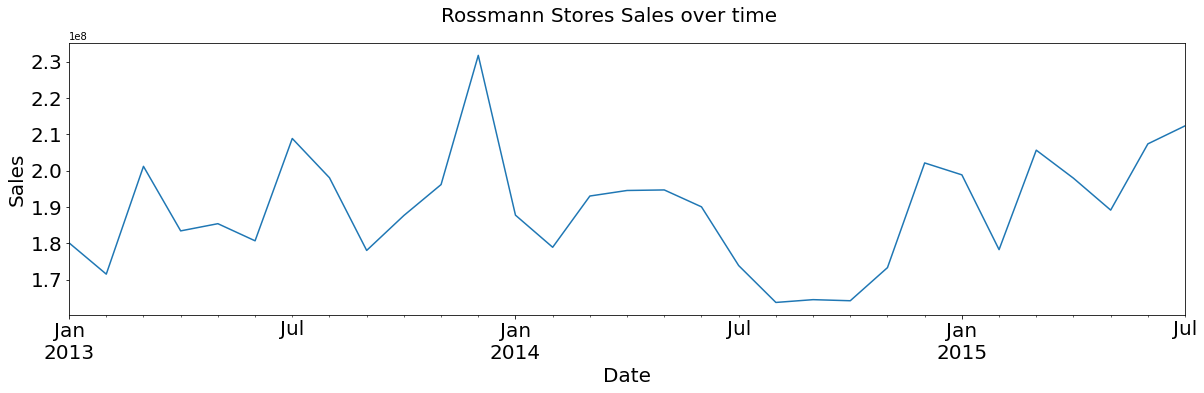

In [26]:
sales_over_time = plt.figure(figsize=(20,5))
sales_over_time = rossmann_sales.set_index(keys='Date',drop=False).resample('M')['Sales'].sum().plot(fontsize=20)
sales_over_time = plt.xlabel('Date', fontsize=20)
sales_over_time = plt.ylabel('Sales', fontsize=20)
sales_over_time = plt.suptitle('Rossmann Stores Sales over time', fontsize = 20)

**VISUALIZATION 2 - Store Wise Monthly Sales**

274

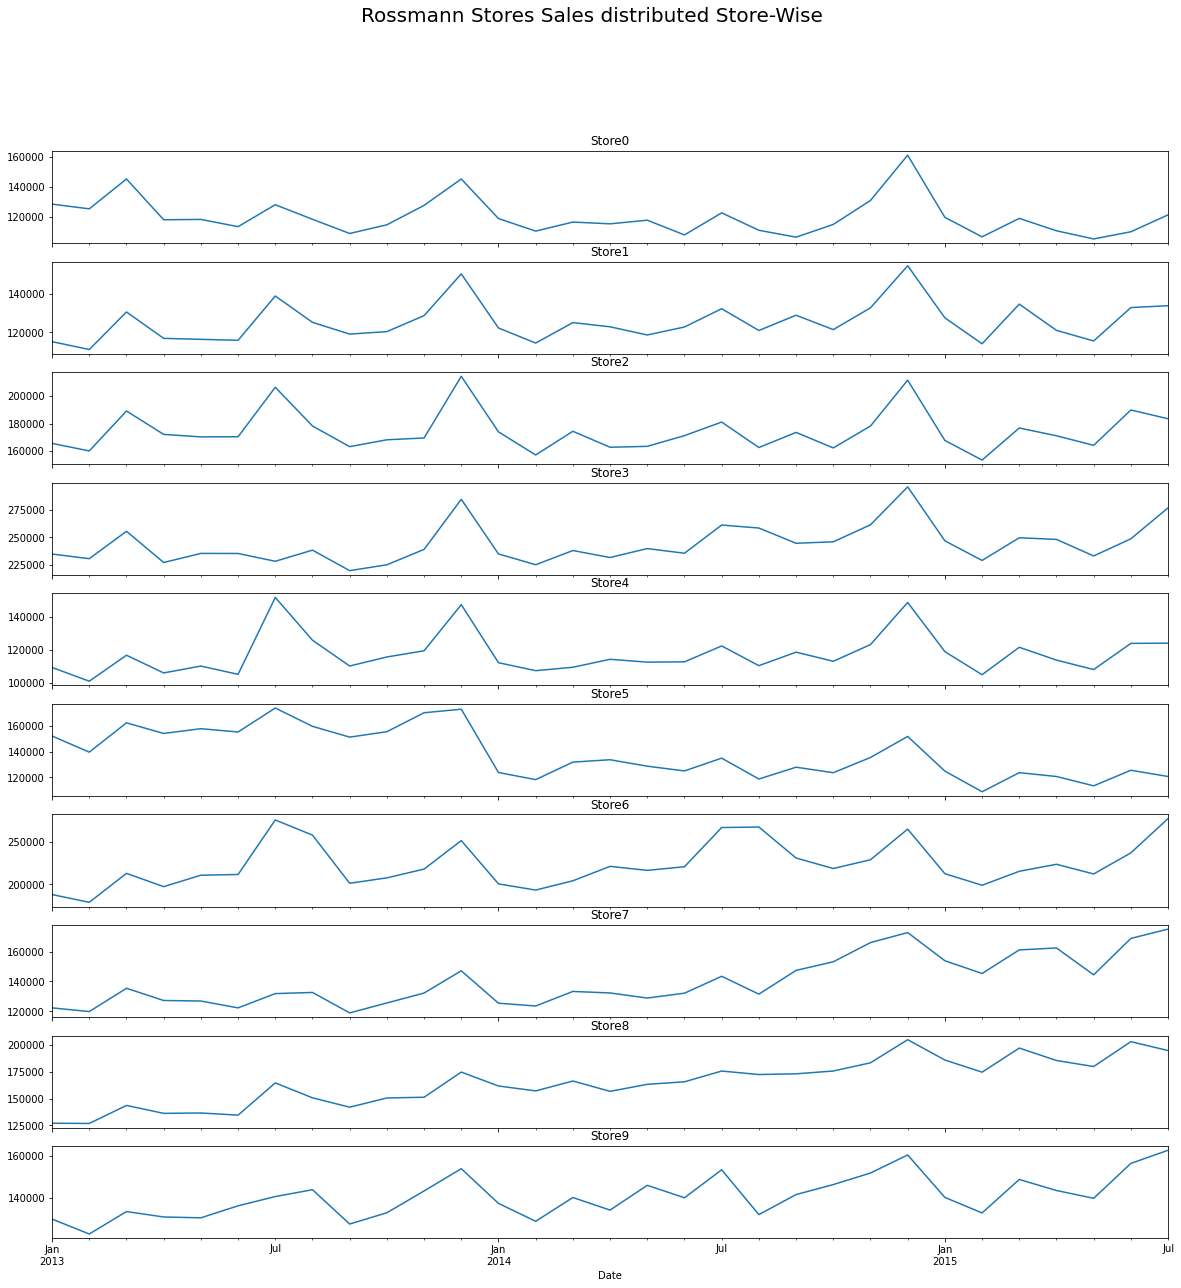

In [27]:
store_wise = rossmann_sales.set_index(keys='Date',drop=False).groupby('Store').resample('M')['Sales'].sum().reset_index(level=[0,1])
f,ax=plt.subplots(10,1,sharex=True)
ax=ax.flatten()
for i in range(10):
    vis_2 = store_wise[store_wise.Store==(i+1)].plot(x='Date',y='Sales',legend=False,title='Store'+str(i),ax=ax[i],figsize=(20,20))
store_wise = plt.suptitle('Rossmann Stores Sales distributed Store-Wise', fontsize = 20)
del store_wise
del vis_2
gc.collect()

In [24]:
rossmann_sales = rossmann_sales.drop('Date', axis = 1)

**VISUALIZATION 3 - Weekly Sales Analysis**

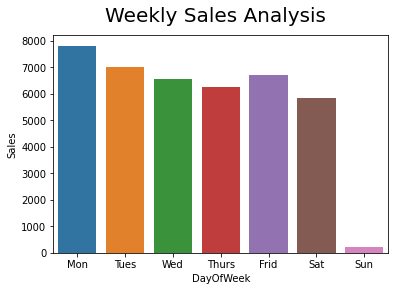

In [29]:
week_roseman = rossmann_sales.groupby(['DayOfWeek'],as_index = False)
week_roseman.groups
week_roseman = week_roseman.agg({'Sales': np.mean})
#week_roseman
week_roseman['DayOfWeek'] = week_roseman['DayOfWeek'].map({7: 'Sun' , 1: 'Mon', 2: 'Tues', 3: 'Wed',
                                                         4: 'Thurs', 5: 'Frid', 6: 'Sat'}).astype(str)
#week_roseman
sns.barplot(x= 'DayOfWeek', y= 'Sales', data = week_roseman)
week_roseman = plt.suptitle('Weekly Sales Analysis', fontsize = 20)

**'The graph above poses 2 big questions: 1- Sunday having least sales!Why? 2- Whether it is just amount or customer footfall decrease?'))**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


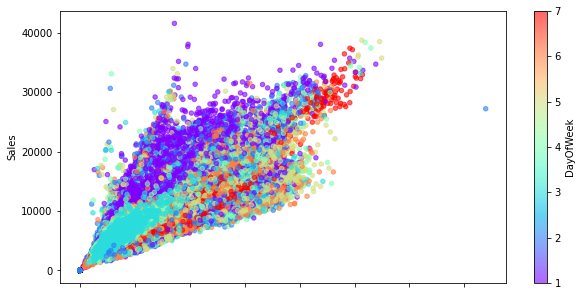

In [30]:
week_rossmann = rossmann_sales.plot.scatter('Customers','Sales',s=20,c='DayOfWeek',cmap='rainbow',figsize=(10,5),alpha=0.6)


**The above graph indicates a rather small footfall on sundays**


**Visualisation 4 - Whether big counters affect the sales or the customer footfall**

In [31]:
store_assort = rossmann_sales.merge(store, on='Store').groupby('Assortment').agg({'Customers':np.mean,'Sales':np.mean})
store_assort["SalesPerCustomer"]= store_assort.Sales/ store_assort.Customers
store_assort


#It suggests while "extra" assortment level stores cater more customers the actual average sales is much lesser than even basic stores. 
#It suffices the assortment level plays a big role in average sales as well actual footfall.

,Customers,Sales,SalesPerCustomer
Assortment,,,
0,619.164636,5481.026096,8.852292
1,2046.361828,8553.931999,4.180068
2,624.222733,6058.676567,9.705953


**Visualisation 5 - Monthly Sales Analysis**

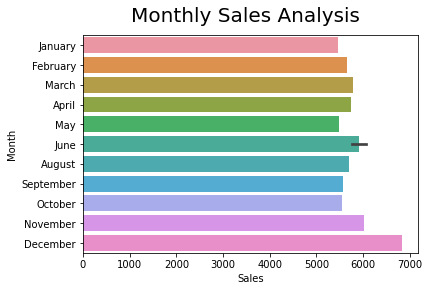

In [32]:
month_rossmann = rossmann_sales.groupby(['Month'],as_index = False)
month_rossmann.groups
month_rossmann = month_rossmann.agg({'Sales': np.mean})
month_rossmann['Month'] = month_rossmann['Month'].map({1: 'January', 2: 'February', 3: 'March',4: 'April', 
                                                     5: 'May', 6: 'June', 7: 'June', 8:'August', 9: 'September',
                                                    10: 'October', 11: 'November', 12: 'December'}).astype(str)
sns.barplot(y= 'Month', x= 'Sales', data = month_rossmann)
month_rossmann = plt.suptitle('Monthly Sales Analysis', fontsize = 20)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


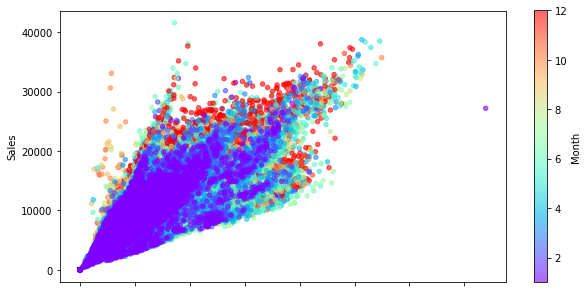

In [33]:
month_rossmann = rossmann_sales.plot.scatter('Customers','Sales',s=20,c='Month',cmap='rainbow',figsize=(10,5),alpha=0.6)

**Visualisation 6 - Yearly Sales Analysis**

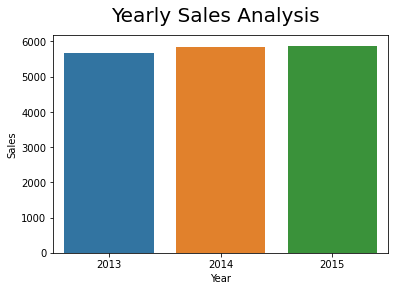

In [34]:
year_rossmann = rossmann_sales.groupby(['Year'],as_index = False)
year_rossmann.groups
year_rossmann = year_rossmann.agg({'Sales': np.mean})

sns.barplot(x='Year', y='Sales', data = year_rossmann)
year_rossmann = plt.suptitle('Yearly Sales Analysis', fontsize = 20)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


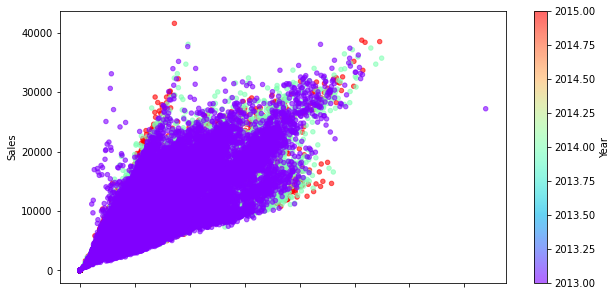

In [35]:
year_rossmann = rossmann_sales.plot.scatter('Customers','Sales',s=20,c='Year',cmap='rainbow',figsize=(10,5),alpha=0.6)

**Visualisation 7 - Distribution of Sales and Customers**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales Distribution')

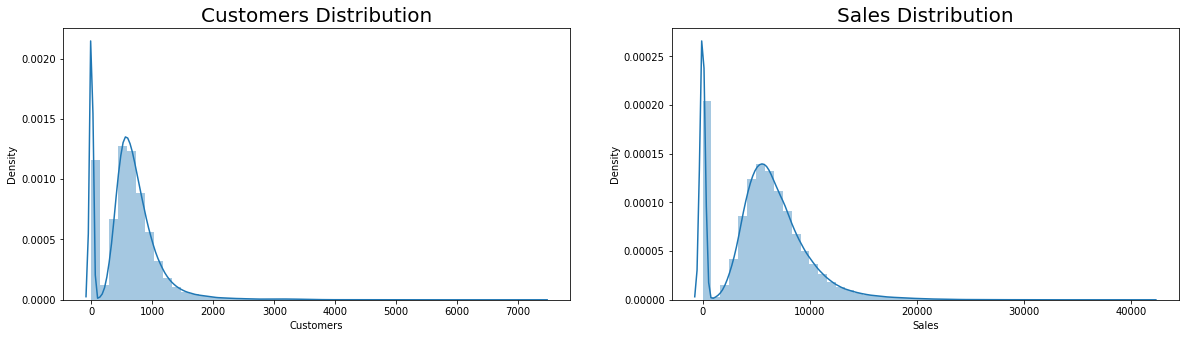

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,5))
cust_dist = sns.distplot(rossmann_sales.Customers,ax=ax[0])
sales_dist = sns.distplot(rossmann_sales.Sales,ax=ax[1])
ax[0].set_title('Customers Distribution', fontsize = 20)
ax[1].set_title('Sales Distribution', fontsize = 20)

**Visualisation 8 - If Promos are Effective for Sales**

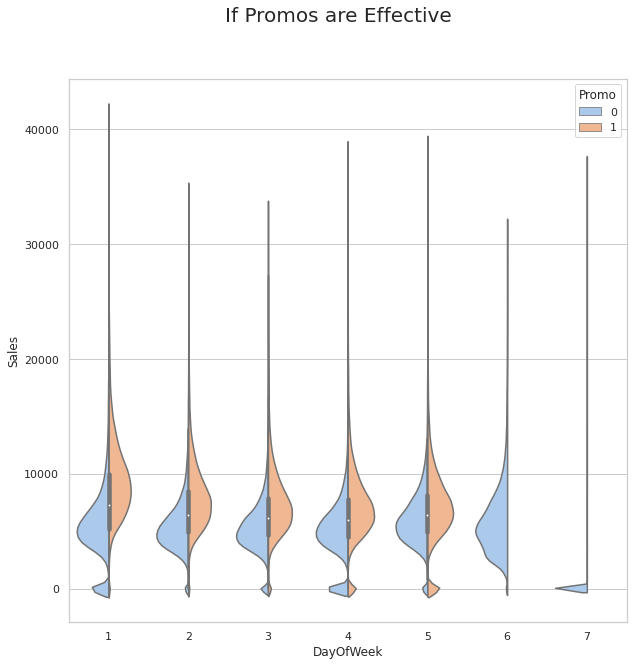

In [56]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data = rossmann_sales)
sales = plt.suptitle('If Promos are Effective', fontsize = 20)

#The days promos were present have indeed shown a slight improvement in Sales. 
#The plot also shows that there was no promo offered on 6th and the 7th day of the week (Saturday and Sunday), 
#and stores didn't suffer for doing so either, as it can be seen the no. of customers on the weekends, were more that that during the weekdays

**Merging Data**

In [67]:
info(rossmann_sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1017209 non-null  int64
 1   DayOfWeek      1017209 non-null  int64
 2   Sales          1017209 non-null  int64
 3   Customers      1017209 non-null  int64
 4   Open           1017209 non-null  int64
 5   Promo          1017209 non-null  int64
 6   StateHoliday   1017209 non-null  int64
 7   SchoolHoliday  1017209 non-null  int64
 8   Year           1017209 non-null  int64
 9   Month          1017209 non-null  int64
 10  Day            1017209 non-null  int64
 11  Week           1017209 non-null  int64
dtypes: int64(12)
memory usage: 93.1 MB


In [25]:
data = rossmann_sales.merge(store,on = 'Store', how='left')
data_y = data['Sales']
data_x = data
data_x = data_x.drop('Sales', axis =1)

In [26]:
rossmann_y = rossmann_sales['Sales']
rossmann_x = rossmann_sales
rossmann_x = rossmann_x.drop('Sales', axis =1)

**Visualisation 9 - Histograms of each Column**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'StateHoliday'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]]

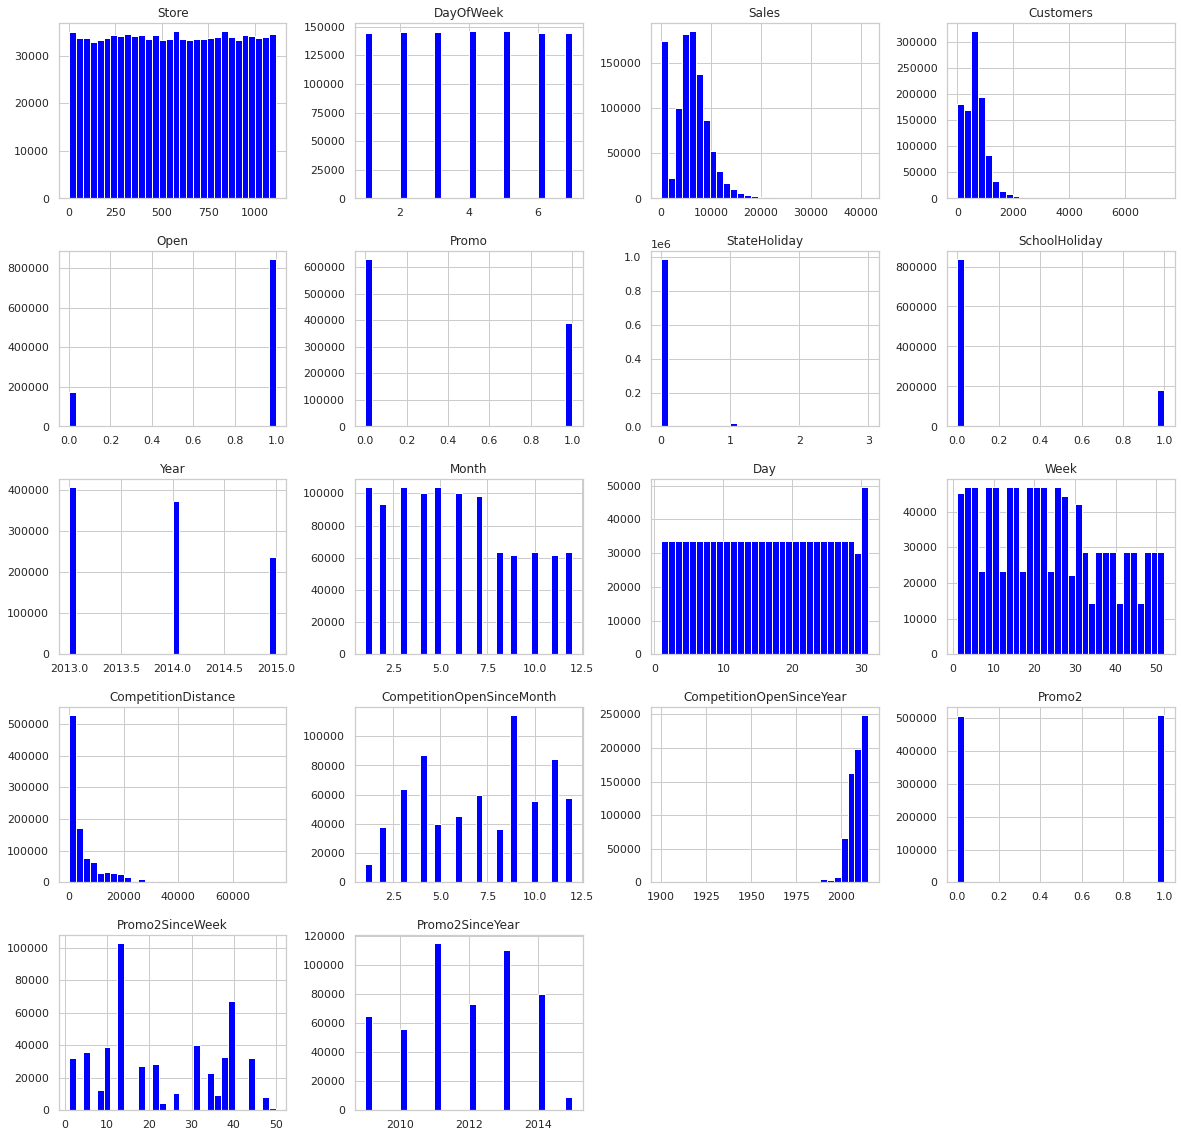

In [63]:
data.hist(bins = 30, figsize=(20,20),color='blue')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   Store                      1017209 non-null  int64
 1   DayOfWeek                  1017209 non-null  int64
 2   Sales                      1017209 non-null  int64
 3   Customers                  1017209 non-null  int64
 4   Open                       1017209 non-null  int64
 5   Promo                      1017209 non-null  int64
 6   StateHoliday               1017209 non-null  int64
 7   SchoolHoliday              1017209 non-null  int64
 8   Year                       1017209 non-null  int64
 9   Month                      1017209 non-null  int64
 10  Day                        1017209 non-null  int64
 11  Week                       1017209 non-null  int64
 12  StoreType                  1017209 non-null  int64
 13  Assortment                 1017209 non-nul

**Visualisation 11 - Feature Importance Plots: Rossmann Data and Combined Data**

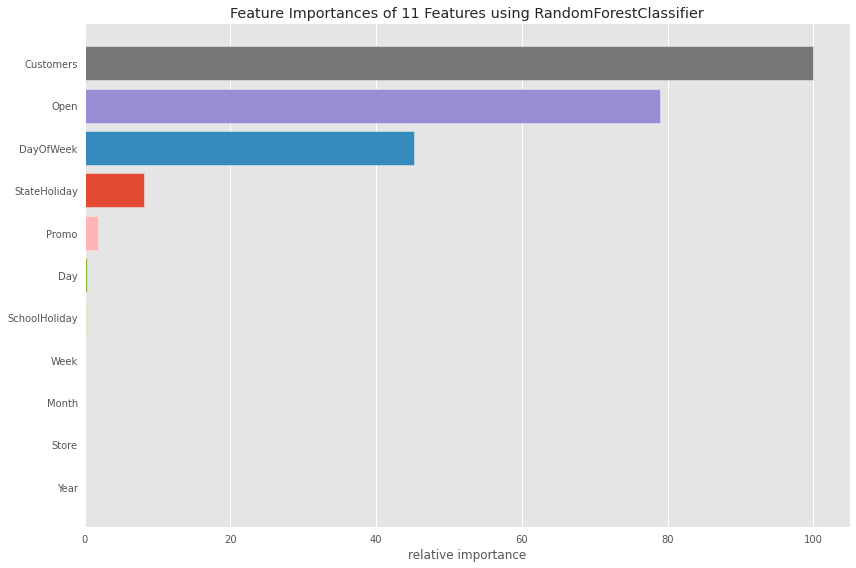

In [65]:
# Rossmann_Sales

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(rossmann_x, rossmann_y)
viz.show();

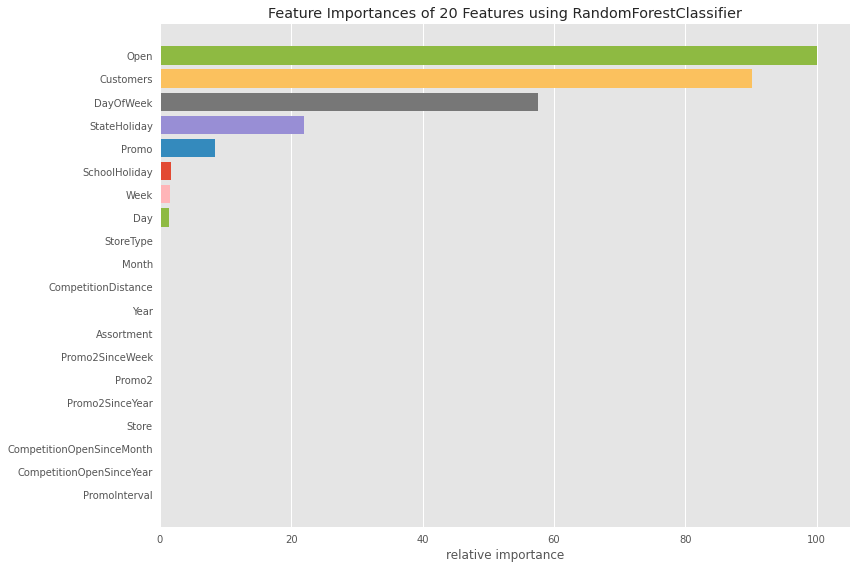

In [28]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(data_x, data_y)
viz.show();

#helps us drop not so important parameters

In [29]:
data_x = data_x.drop(['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'PromoInterval'],axis=1)


In [30]:
data_y.value_counts()

0        172871
5674        215
5558        197
5483        196
6049        195
          ...  
17847         1
24317         1
25114         1
19154         1
21958         1
Name: Sales, Length: 21734, dtype: int64

**Visualisation 12 - Depciting Correlation**

<AxesSubplot:>

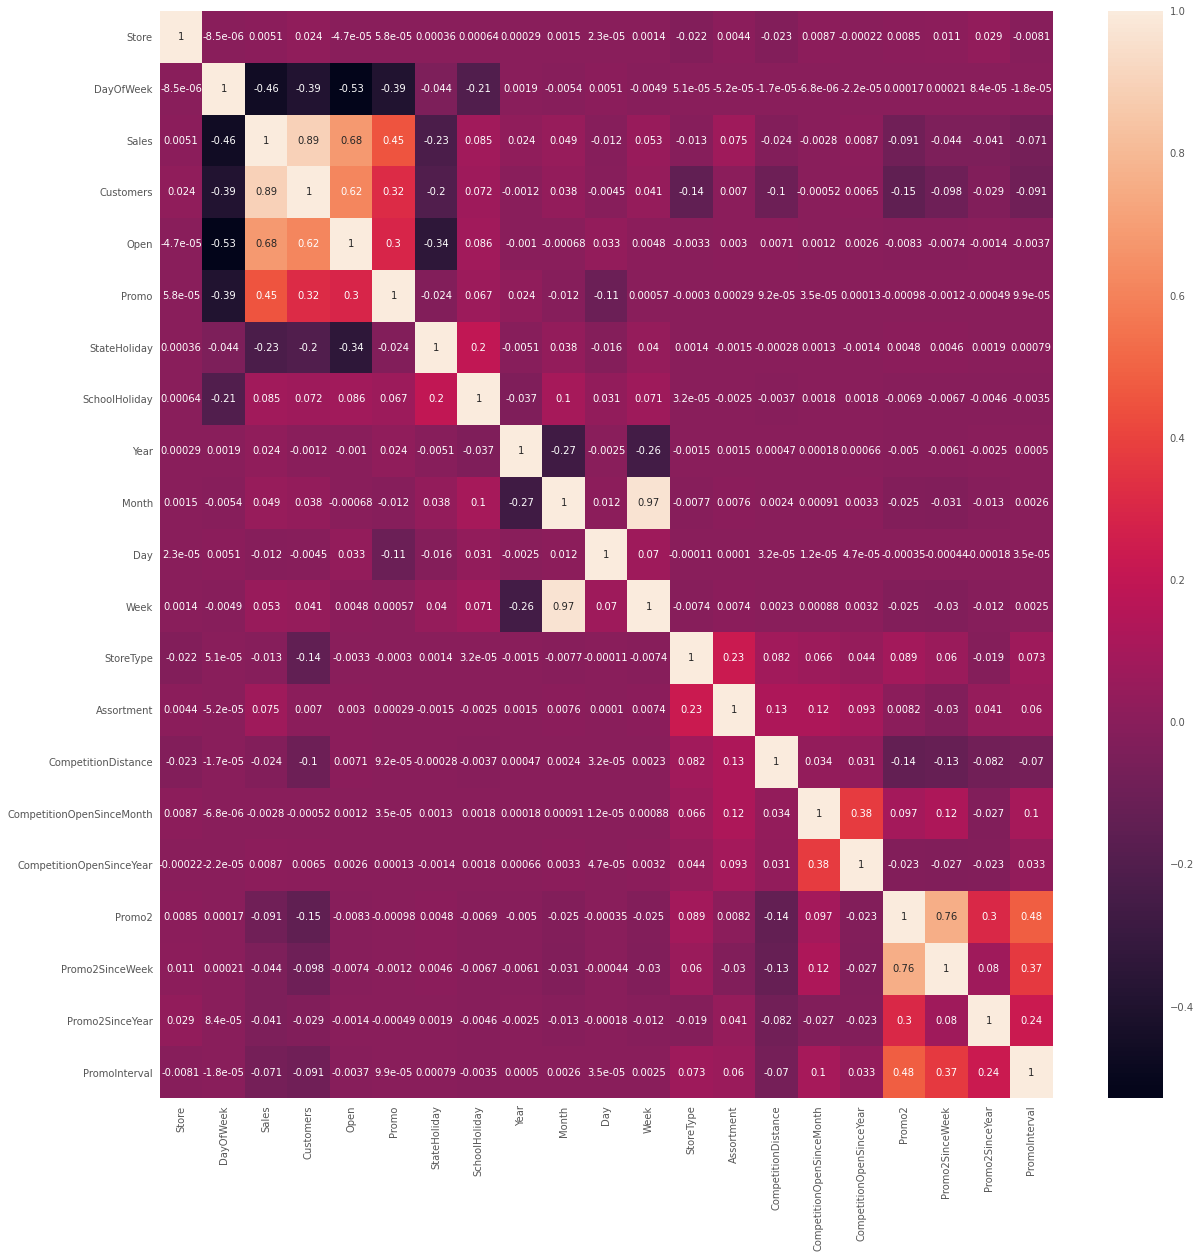

In [31]:
correlations = data.corr()
f,ax =plt.subplots(figsize = (20,20))
sns.heatmap(correlations,annot=True)

**Visualisation 13 - Understandng Trends in Various Columns**

<Figure size 864x576 with 0 Axes>

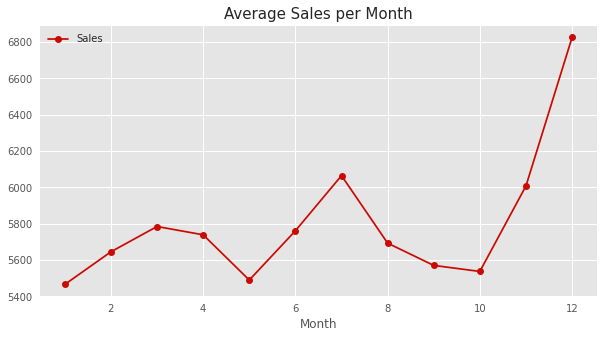

<Figure size 864x576 with 0 Axes>

In [40]:
# Minimum sales in start of month and max at the end
axis = data.groupby('Month')[['Sales']].mean().plot(figsize = (10,5),color = 'r' , marker = 'o')

axis.set_title('Average Sales per Month', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

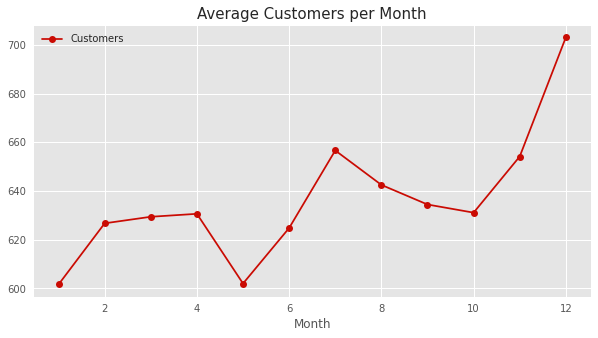

<Figure size 864x576 with 0 Axes>

In [33]:
# Minimum customers in start of month and max at the end
axis = data.groupby('Month')[['Customers']].mean().plot(figsize = (10,5),color = 'r' , marker = 'o')
axis.set_title('Average Customers per Month', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

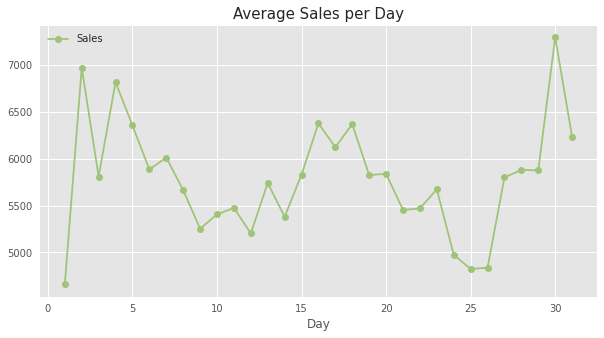

<Figure size 864x576 with 0 Axes>

In [34]:
## Minimum number of sales are on 24th of a month and generally maximum is at beginning and at the end of the month.
axis = data.groupby('Day')[['Sales']].mean().plot(figsize = (10,5),color = 'g' , marker = 'o')
axis.set_title('Average Sales per Day', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

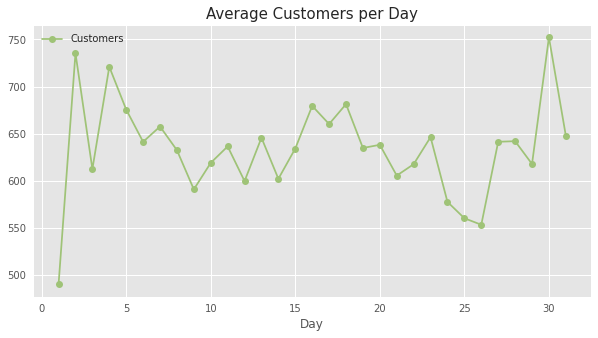

<Figure size 864x576 with 0 Axes>

In [35]:
# Minimum number of customers are on 24th of a month and generally maximum is at beginning and at the end of the month.
axis = data.groupby('Day')[['Customers']].mean().plot(figsize = (10,5),color = 'g' , marker = 'o')
axis.set_title('Average Customers per Day', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

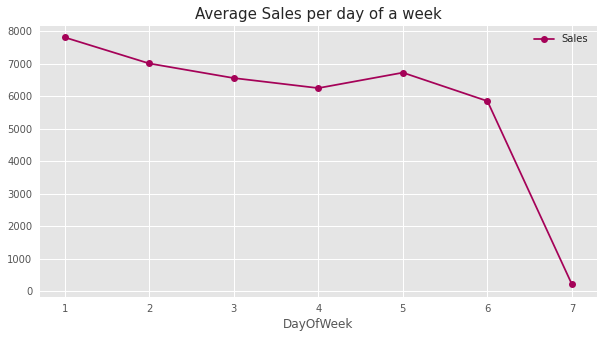

<Figure size 864x576 with 0 Axes>

In [36]:
#Most sales are on Tuesday and Monday
#Minimum sales is on Sunday
axis = data.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5),color = 'm' , marker = 'o')
axis.set_title('Average Sales per day of a week', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

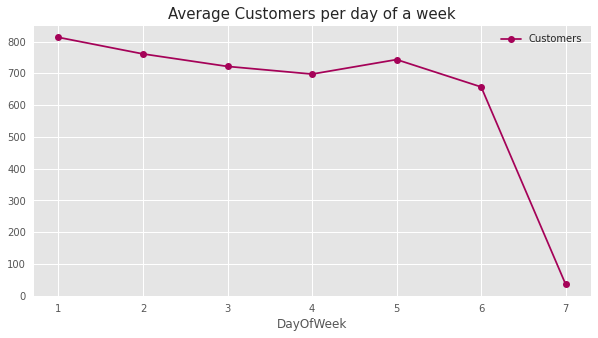

<Figure size 864x576 with 0 Axes>

In [37]:
# Customers visit most on Monday
# Customers visit stores less on Sunday
axis = data.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5),color = 'm' , marker = 'o')
axis.set_title('Average Customers per day of a week', fontsize = 15)
plt.figure()

<Figure size 864x576 with 0 Axes>

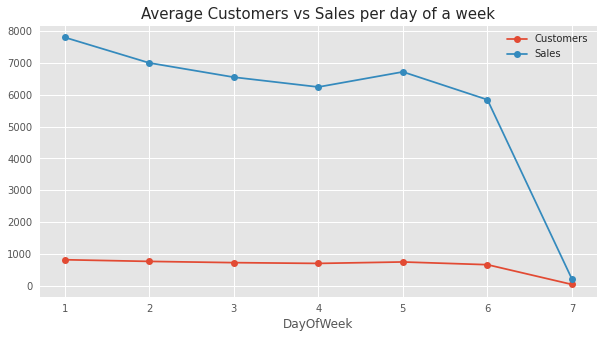

<Figure size 864x576 with 0 Axes>

In [38]:
axis = data.groupby('DayOfWeek')[['Customers', 'Sales']].mean().plot(figsize = (10,5) , marker = 'o')
axis.set_title('Average Customers vs Sales per day of a week', fontsize = 15)
plt.figure()

# FORECASTING USING REGRESSION MODELS

**Splitting the data into train set, validation set and test set**

In [186]:
X_train,X_for_test,y_train,y_for_test = train_test_split(data_x, data_y,test_size = 0.3, random_state = 123)
X_validation, X_test, y_validation, y_test = train_test_split(X_for_test, y_for_test, test_size = 0.5, random_state = 123)

In [187]:
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(712046, 16) (712046,) (152581, 16) (152581,) (152582, 16) (152582,)


In [188]:
print(y_validation.dtype)

int64


**Checking Numerical and Categorical Columns of a Dataset**

In [189]:
colunique = X_train.nunique
cols= (X_train.nunique() < 8 )
cols
cat_cols = cols[cols==True].index.tolist()
num_cols = cols[cols==False].index.tolist()
cat_cols
num_cols

['Store', 'Customers', 'Month', 'Day', 'Week', 'Promo2SinceWeek']

In [190]:
cat_cols_new = ['Promo2','Promo2SinceYear','DayOfWeek','Open','Promo','SchoolHoliday']
obj_cols = ['StoreType','Assortment','StateHoliday']

In [191]:
print(X_train.columns.values)

['Store' 'DayOfWeek' 'Customers' 'Open' 'Promo' 'StateHoliday'
 'SchoolHoliday' 'Year' 'Month' 'Day' 'Week' 'StoreType' 'Assortment'
 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear']


# Linear Regression Model


In [192]:
from sklearn.metrics import r2_score, accuracy_score   #coefficient of determination- regression score function
from sklearn.linear_model import LinearRegression 
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

LinearRegression()

**Prediction on validation test**

In [193]:
y_predict_reg = linear_reg_model.predict(X_validation)

**Function to make a dataframe and compare the values**

In [194]:
def make_df(prediction):
    pred_df = pd.DataFrame({'Predictions': prediction,'Actual': y_validation})
    pred_df = pred_df.reset_index(drop=True)
    return(pred_df)

In [195]:
df_reg = make_df(y_predict_reg)
df_reg.head() # to show first 5 columns

,Predictions,Actual
0,8395.816182,8371
1,1020.648409,0
2,4723.852690,5029
3,7301.046911,10704
4,5421.070785,4877


**Check for r2 score of the model: We dont use accuracy score because it has multiclass and mix of continuous target items**

In [196]:
score_reg = r2_score(y_validation, y_predict_reg)
score_reg

0.866858217090207

In [197]:
linear_reg_model.score(X_validation, y_validation)

0.866858217090207

**Plot Graph between Actual and Predicted**

In [198]:
def plot(dataset):
    plt.figure(figsize=(10,10))
    dataset["Actual"][:25,].plot.line()
    dataset["Predictions"][:25,].plot.line()
    plt.legend()
    plt.show()

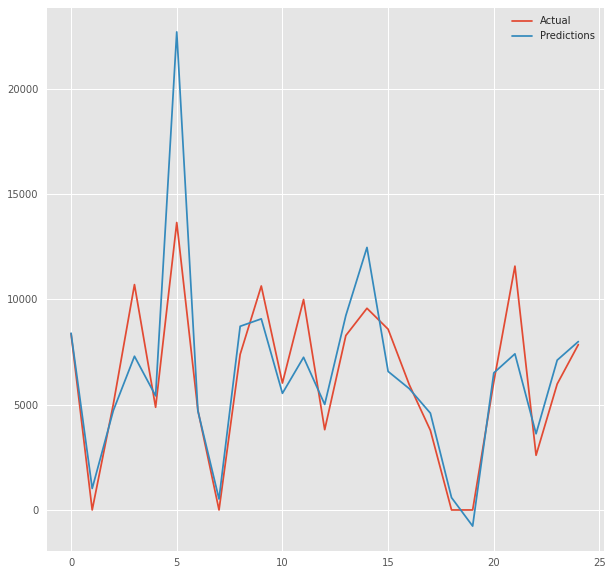

In [199]:
plot(df_reg)

# Linear Regression Model with Pipeline

In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
SS = StandardScaler()
OHE = OneHotEncoder()
OE  = OrdinalEncoder()
LR = LinearRegression()

preprocess = make_column_transformer(
                                     (SS,num_cols),
                                     (OHE,obj_cols)
                                     )

pipeline_linreg = make_pipeline(preprocess,LR)

pipeline_linreg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Store', 'Customers',
                                                   'Month', 'Day', 'Week',
                                                   'Promo2SinceWeek']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['StoreType', 'Assortment',
                                                   'StateHoliday'])])),
                ('linearregression', LinearRegression())])

In [200]:
y_predict_linreg = pipeline_linreg.predict(X_validation)

In [201]:
df_linreg = make_df(y_predict_linreg)
df_linreg.head()

,Predictions,Actual
0,7917.026891,8371
1,1998.794763,0
2,4722.954933,5029
3,6795.471803,10704
4,6278.143538,4877


In [202]:
score_linreg = r2_score(y_validation, y_predict_linreg)
score_linreg

0.8716567814543199

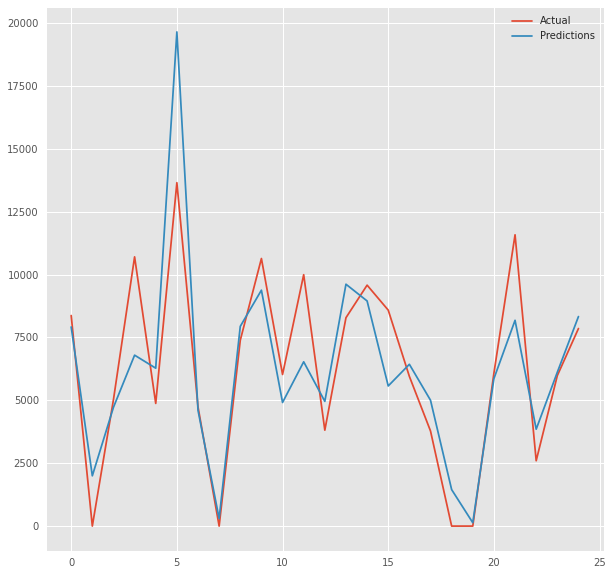

In [142]:
plot(df_linreg)

# Regression Model with Elastic Net: Uses both Lasso and Ridge Regression Models- L1 and L2 Regularization

In [143]:
#ElasticNet is a hybrid of Lasso and Ridge, where both the absolute value penalization and squared penalization are included, 
#being regulated with another coefficient l1_ratio:

from sklearn.linear_model import ElasticNet

EN = ElasticNet()
pipeline_elasticnet = make_pipeline(preprocess,EN)
parameters = {'elasticnet__l1_ratio': np.linspace(0,1,30)}

# Calling Grid Search CV 
Grid_Search_EN = GridSearchCV(pipeline_elasticnet,parameters)
Grid_Search_EN.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2513879744203.439, tolerance: 843910772.8145452
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2510997910273.2046, tolerance: 843210153.1684773
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2516024100468.2373, tolerance: 844703504.4299545
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2512849266

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Store',
                                                                          'Customers',
                                                                          'Month',
                                                                          'Day',
                                                                          'Week',
                                                                          'Promo2SinceWeek']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                  

In [144]:
y_predict_regelastic = Grid_Search_EN.predict(X_validation)

In [145]:
r2_score = Grid_Search_EN.score(X_validation, y_validation)
print("Tuned ElasticNet Alpha: {}".format(Grid_Search_EN.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_score))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8716539262889172


In [146]:
df_regelastic = make_df(y_predict_regelastic)
df_regelastic.head()

,Predictions,Actual
0,7911.249810,8371
1,1995.564282,0
2,4719.415245,5029
3,6790.671702,10704
4,6276.807877,4877


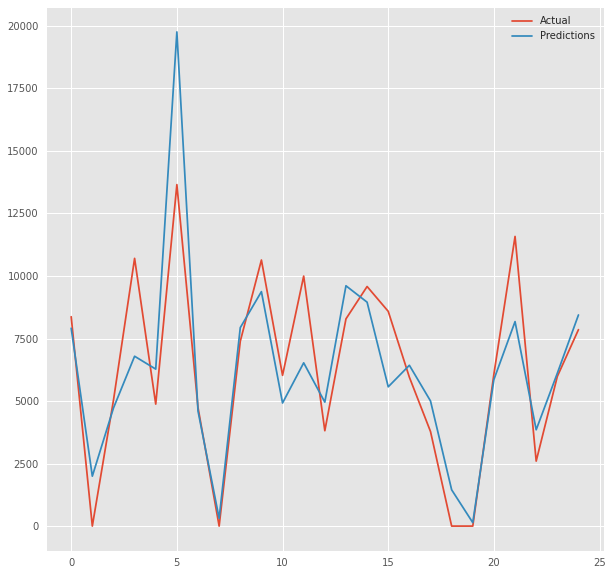

In [147]:
plot(df_regelastic)

# Random Forest Regressor Model

In [232]:
#It is an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at
#training time and outputting the mean/average prediction (in case of regression) of the individual trees.
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth = 5)
#pipeline_rf = make_pipeline(preprocess,RF)
RF.fit(X_train,y_train) 

RandomForestRegressor(max_depth=5)

In [233]:
y_predict_rf = RF.predict(X_validation)

In [234]:
y_predict_rfg = y_predict_rf.astype('float64')
print(y_predict_rfg.dtype)

float64


In [236]:
score = r2_score(y_validation, y_predict_rf)
score

0.8770173470588941

In [235]:
df_rf = make_df(y_predict_rf)
df_rf.head()

,Predictions,Actual
0,7615.692524,8371
1,0.000720,0
2,4211.909490,5029
3,7100.328611,10704
4,6391.353176,4877


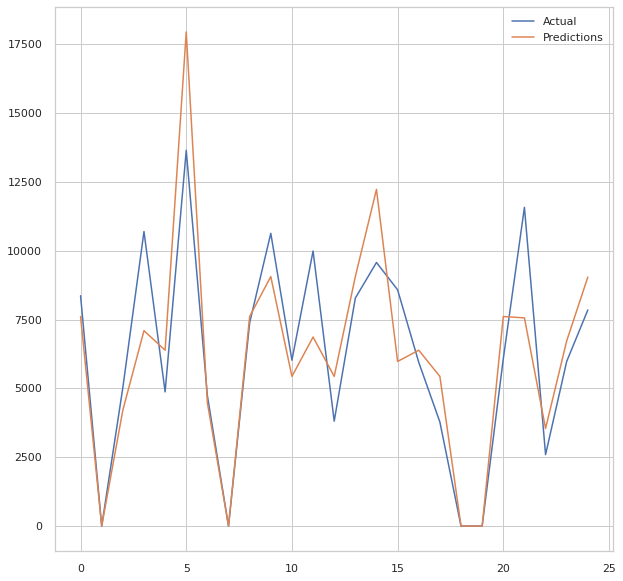

In [237]:
plot(df_rf)

# Gradient Boosting Decision Trees Model


In [203]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

lgb_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, n_estimators=700,
              reg_alpha=0.1, reg_lambda=1, subsample=1)

In [204]:
y_predict_gbdt = lgb_model.predict(X_validation)

df_gbdt = make_df(y_predict_gbdt)
df_gbdt.head()

,Predictions,Actual
0,8874.592005,8371
1,-132.599575,0
2,5384.073060,5029
3,10403.997188,10704
4,5232.903728,4877


In [205]:
score_gbdt = r2_score(y_validation, y_predict_gbdt)
print(score_gbdt)

0.9862314372077744


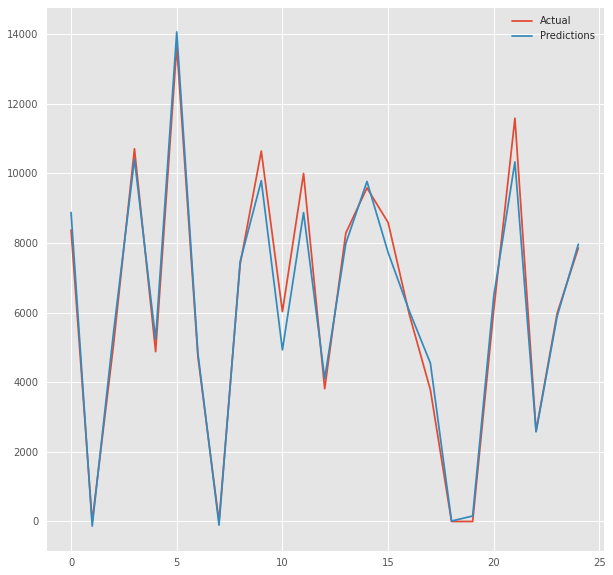

In [206]:
plot(df_gbdt)

# Predicting the sales in the test set (unseen set taken from train set)

In [207]:
y_pred_test = lgb_model.predict(X_test)
score_test = r2_score(y_test, y_pred_test)
score_test

0.9863295587973833

In [209]:
df_test = pd.DataFrame({'Predictions': y_pred_test,'Actual': y_test})
df_test = df_test.reset_index(drop=True)
df_test.head()

,Predictions,Actual
0,7040.658911,6882
1,6840.728687,7682
2,4983.640636,5176
3,32.036457,0
4,4583.972596,4486


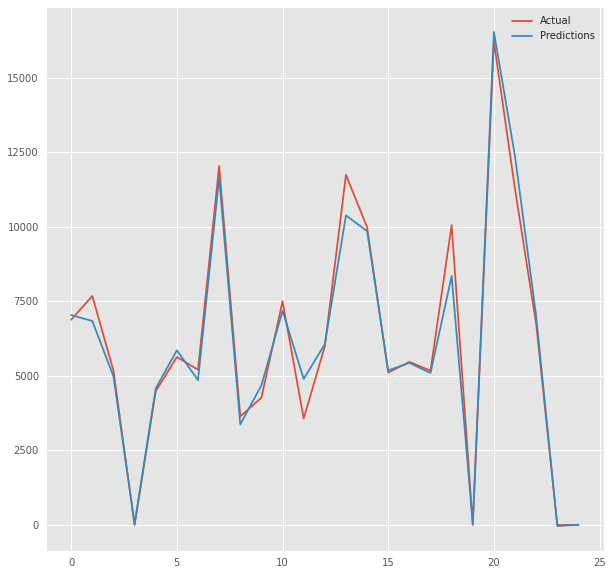

In [210]:
plot(df_test)

# XG Boost Regressor Model

In [211]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
y_predict_xg = model.predict(X_validation)

In [213]:
y_predict_xg = y_predict_xg.astype('float64')
print(y_predict_xg.dtype)

float64


In [214]:
score_xg = r2_score(y_validation, y_predict_xg)
score_xg

0.9767713074175141

In [216]:
df_xgboost = make_df(y_predict_xg)
df_xgboost.head()

,Predictions,Actual
0,8824.770508,8371
1,-236.363602,0
2,4958.731934,5029
3,10087.596680,10704
4,5342.339844,4877


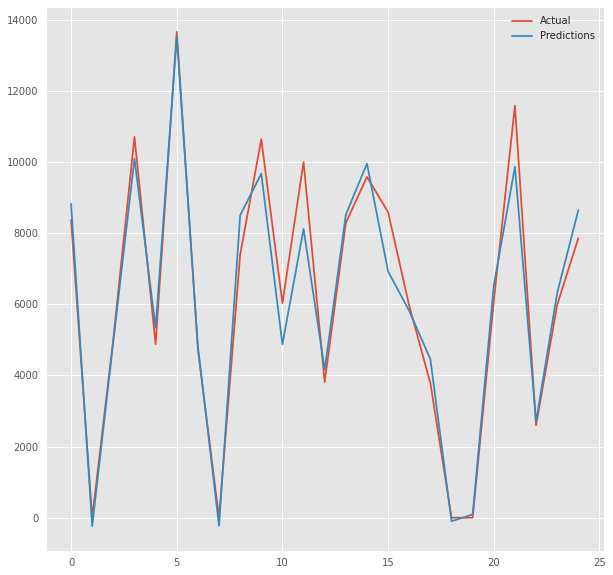

In [217]:
plot(df_xgboost)

# Predicting Sales on Test Set (unseen taken from Train Set)

In [218]:
y_pred_test = model.predict(X_test)
score_test = r2_score(y_test, y_pred_test)
score_test

0.9767741721916313

In [220]:
xg_test = pd.DataFrame({'Predictions': y_pred_test,'Actual': y_test})
xg_test = xg_test.reset_index(drop=True)
xg_test.head()

,Predictions,Actual
0,7254.192383,6882
1,6704.195312,7682
2,5051.812500,5176
3,97.531105,0
4,4815.823242,4486


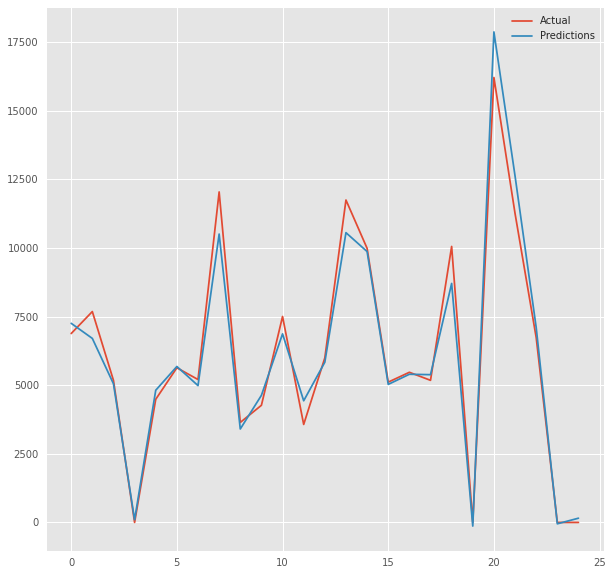

In [221]:
plot(xg_test)

# TIME SERIES ANALYSIS

In [222]:
import random
time_features = rossmann_sales[["Year","Month","Day",	"Week", "Promo", "Open","Store","Sales"]]
#Choose a random store
x = random.randint(2,1115)
print(x)
time_features = time_features.loc[time_features['Store'] == x]

709


**To check for any cyclic trends in various years**

In [223]:
def time_series_plot(year):
    plt.figure(figsize=(10,10))
    sns.set(style="whitegrid")
    sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == year])

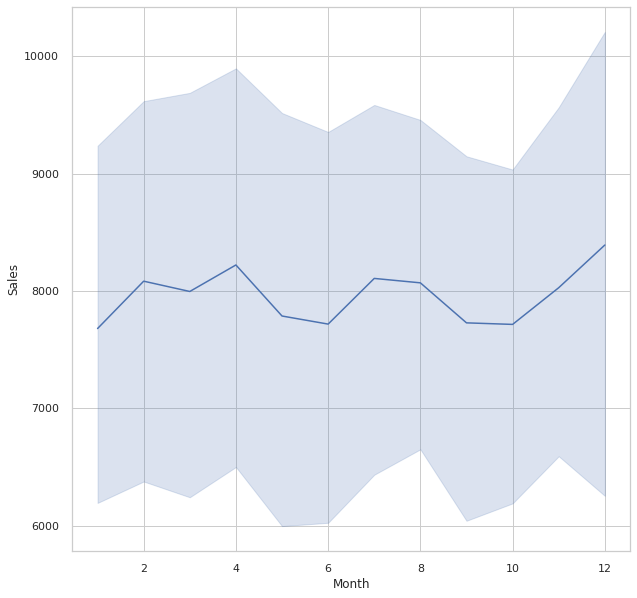

In [224]:
time_series_plot(2013)

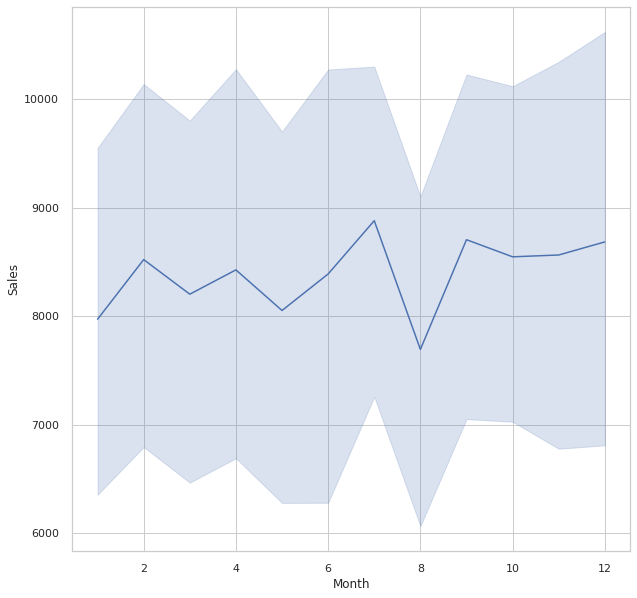

In [225]:
time_series_plot(2014)

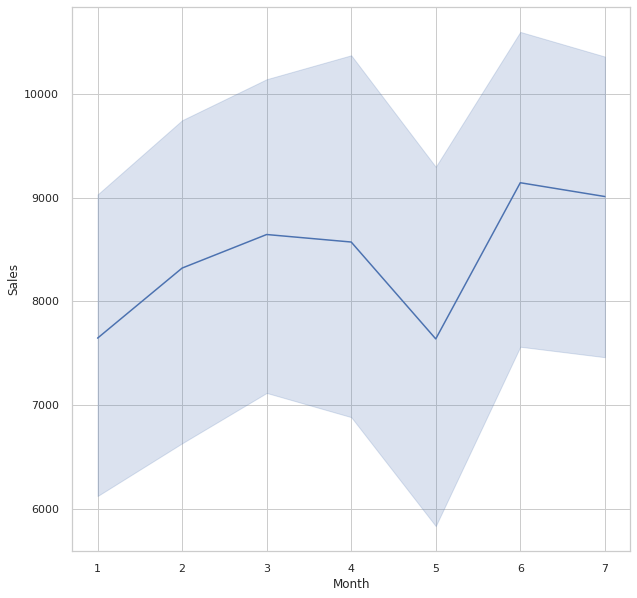

In [226]:
time_series_plot(2015)

**No cyclic trends found anywhere**

**Roseman problem is a problem of continous sales data. Exponential Moving Averages are (EMA) is a best indicator to analyse A. Trend in a Data - This means that sales data is in a uptrend or downtrend. B. Seasonality in a data- This means where sales figure increases in some speciific timeframes.**

For ananlysing regression problems Exponential Moving Average (EMA) figures gives complete picure of data. By analysing this data we are able to understand whether doing business is feasible what are the important opportunities when we are able to get optimum benifits.

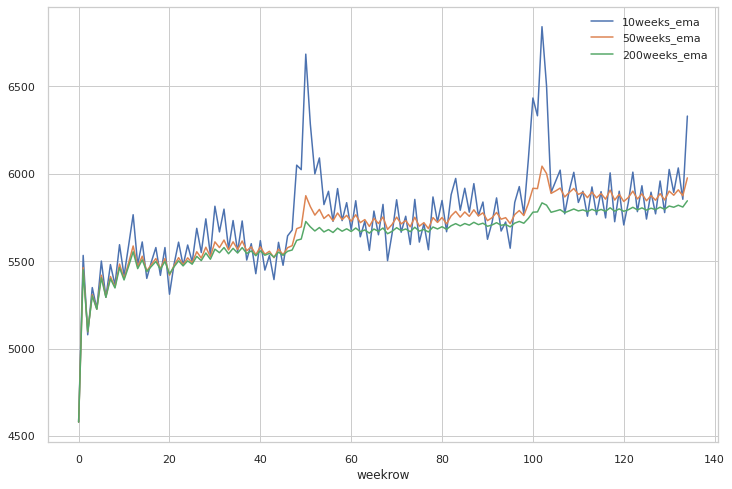

In [227]:
#Exponential Moving Average chart of Sales figure
rossmann_weekly = data.groupby(['Year','Week'],as_index = False)
rossmann_weekly.groups
rossmann_weekly = rossmann_weekly.agg({'Sales':np.mean})
rossmann_weekly = rossmann_weekly.sort_values(by = ['Year','Week'])
rossmann_weekly['weekrow']= rossmann_weekly.reset_index().index

rossmann_weekly['10weeks_ema'] = rossmann_weekly.Sales.ewm(span=10).mean()
rossmann_weekly['50weeks_ema'] = rossmann_weekly.Sales.ewm(span=50).mean()
rossmann_weekly['200weeks_ema'] = rossmann_weekly.Sales.ewm(span=200).mean()
rossmann_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()

Conclusion and Observations - While Analysing Exponential Moving Average chart Roseman sales we analyse following observations,

Trend - EMA chart analyse that Roseman data is in uptrend and it always above the 200 Exponential Moving Average figures but 200 EMA line is not a steep slope informs that Roseman sales figure is in slow uptrend.

Seasonlity - 10 days EMA chart figures shows that sales has upward seasonality and for some weeks sales figures improves drastically.

In [ ]:
rossmann_weekly.head()

**Store Type Wise Exponential Moving Average Analysis - While analysing database we observe that Roseman have four different types of stores. After analysing complete dataset, We now analyse Exponential Moving Average Analysis of Sales figures Storetype wise means how the behaviour of different store types in order to going deeper and understand how to improve sales.*Store Type Wise Exponential Moving Average Analysis - While analysing database we observe that Roseman have four different types of stores. After analysing complete dataset, We now analyse Exponential Moving Average Analysis of Sales figures Storetype wise means how the behaviour of different store types in order to going deeper and understand how to improve sales.*

In [228]:
#EMA Analysis Storewise
def ema_plotstorewise(dataset, store):
    plot_ema = dataset.groupby(['Year','Week'],as_index = False)
    plot_ema.groups
    plot_ema = plot_ema.agg({'Sales':np.mean})
    rossmann_weekly = plot_ema.sort_values(by = ['Year','Week'])
    plot_ema['weekrow']= plot_ema.reset_index().index
    plot_ema['20days_ema'] = plot_ema.Sales.ewm(span=20).mean()
    plot_ema['50days_ema'] = plot_ema.Sales.ewm(span=50).mean()
    plot_ema['200days_ema'] = plot_ema.Sales.ewm(span=200).mean()
    
    plot_ema.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
    plot_ema = plt.suptitle('Store Wise Time Series Analysis of Store Type: ' + store, fontsize = 15)
    plt.show()
   

In [229]:
#Moving Average Chart of Store Wise Sales Figure
rossmann_a = data.loc[data['StoreType'] == 1]
rossmann_b = data.loc[data['StoreType'] == 2]
rossmann_c = data.loc[data['StoreType'] == 3]
rossmann_d = data.loc[data['StoreType'] == 4]

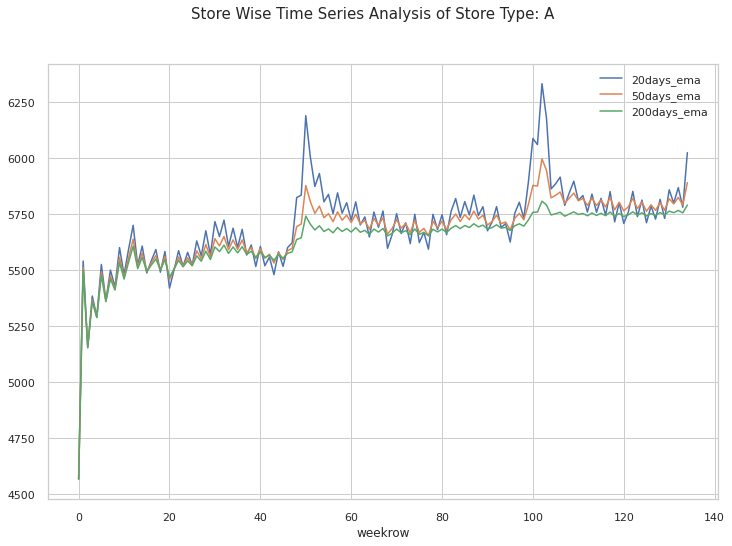

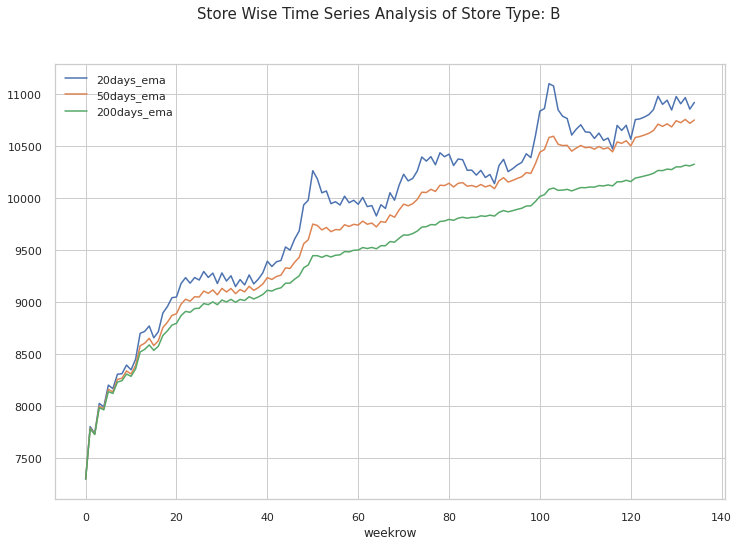

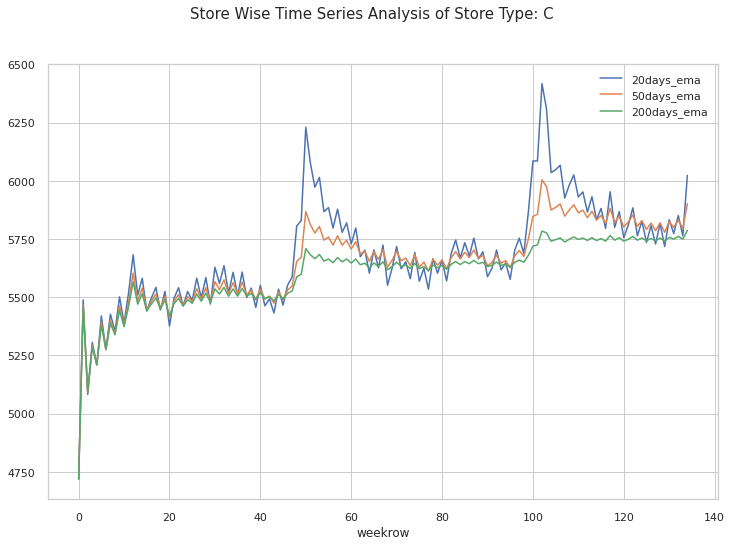

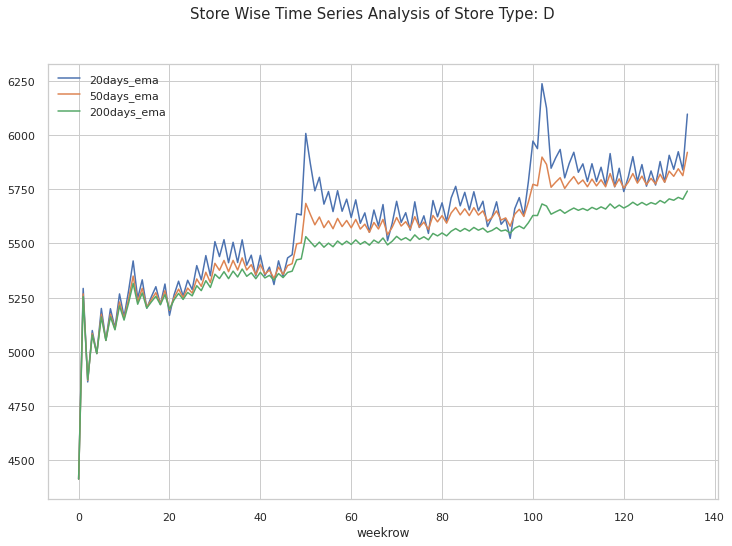

In [230]:
ema_plotstorewise(rossmann_a, 'A')
ema_plotstorewise(rossmann_b, 'B')
ema_plotstorewise(rossmann_c, 'C')
ema_plotstorewise(rossmann_d, 'D')

**Seasonal Behaviour**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


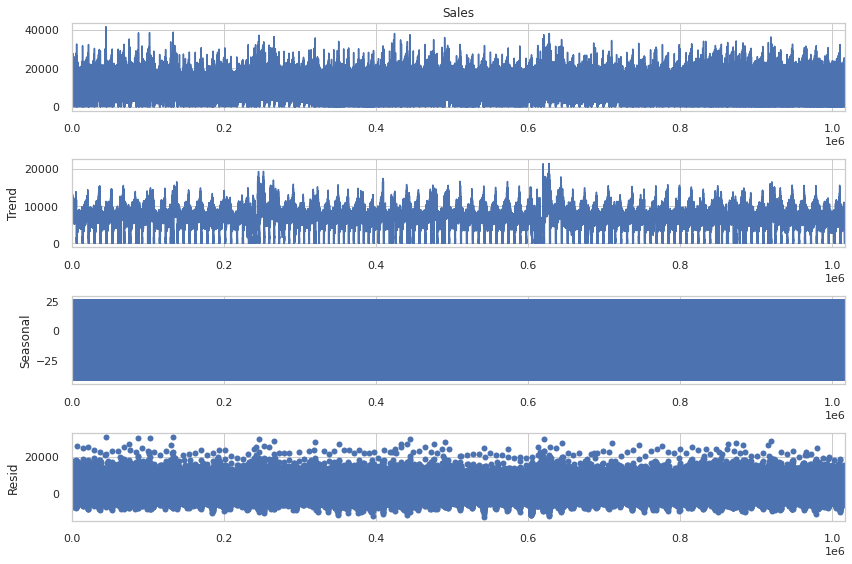

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(data['Sales'], freq = 7)
type(decomp_results)
decomp_results.plot()
plt.show()

# Clearly, we see that there is a weekly and yearly seasonal pattern. But, we will focus only on the weekly sesonal pattern